In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Read in Train and Test Data sets

In [2]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df['unclean'] = df['text']

In [3]:
df.head()

,id,keyword,location,text,target,unclean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...


### Check for null values

In [4]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
unclean        0
dtype: int64

In [5]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Key words have %20 instead of spaces so fill those

In [6]:
df['keyword'].unique()[:25]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard'],
      dtype=object)

**Tweet cleaner**

In [7]:
def cleaner(tweet):
    tweet = re.sub('[()!?]',"", tweet)
#   tweet = re.sub('\[.*?\]',"", tweet)
    tweet = re.sub("@[A-Za-z0-9_]+","",tweet) #Remove @ sign
#   tweet = re.sub("#[A-Za-z0-9_]+","",tweet) # Remove Hashtags
    tweet = re.sub("http\S+","", tweet) #Remove http links
    tweet = re.sub("www\S+","", tweet) #Remove www links
    tweet = re.sub("[^a-z0-9]"," ", tweet) # Filtering non-alphanumeric characters
    return tweet.lower()

**Fix Training set by filling na values with '' and %20 with ' '.**

In [8]:
df['location'] = df['location'].fillna('')
df['keyword'] = df['keyword'].fillna('')
df['text'] = df['text'].map(lambda x: cleaner(x))
df = df.replace('%20', ' ', regex=True)

In [9]:
df_test['location'] = df_test['location'].fillna('')
df_test['keyword'] = df_test['keyword'].fillna('')
df_test['text'] = df_test['text'].map(lambda x: cleaner(x))
df_test = df_test.replace('%20', ' ', regex=True)

In [10]:
df

,id,keyword,location,text,target,unclean
0,1,,,ur eeds are the eason of this earthquake ...,1,Our Deeds are the Reason of this #earthquake M...
1,4,,,orest fire near a onge ask anada,1,Forest fire near La Ronge Sask. Canada
2,5,,,ll residents asked to shelter in place are ...,1,All residents asked to 'shelter in place' are ...
3,6,,,13 000 people receive wildfires evacuation or...,1,"13,000 people receive #wildfires evacuation or..."
4,7,,,ust got sent this photo from uby laska as ...,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...
7608,10869,,,wo giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,,,he out of control wild fires in alifornia ...,1,@aria_ahrary @TheTawniest The out of control w...
7610,10871,,,1 94 01 04 5km of olcano awaii,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,,,olice investigating after an e bike collided ...,1,Police investigating after an e-bike collided ...


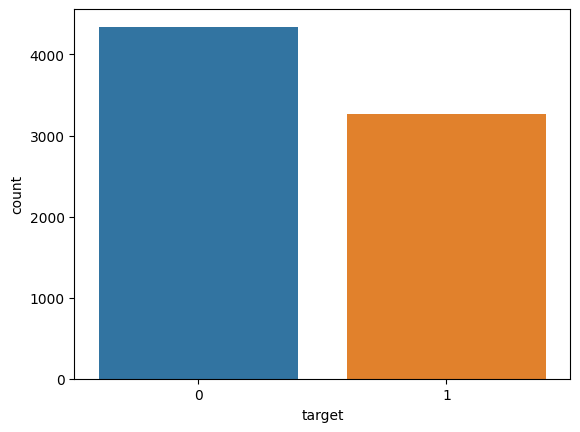

In [11]:
sns.countplot(data=df, x='target');

In [12]:
df[800:1400]

,id,keyword,location,text,target,unclean
800,1160,blight,Laventillemoorings,f you dotish to blight your car go right ahea...,0,If you dotish to blight your car go right ahea...
801,1162,blight,UK,exual evolution light or omen is out to...,0,Sexual Revolution:Blight For Women is out! htt...
802,1164,blight,Scotland,...,0,LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...
803,1166,blight,London,what is double result live on the app,0,@WillHillBet what is double result live on the...
804,1167,blight,"Vancouver, BC",first off it is the ippo ine as no one want...,0,@parksboardfacts first off it is the #ZippoLin...
...,...,...,...,...,...,...
1395,2014,casualties,Philippines,ivilian casualties rise as fghan war intensi...,1,Civilian casualties rise as Afghan war intensi...
1396,2015,casualties,,fghan conflict sees sharp rise in female ca...,1,Afghan conflict sees 'sharp rise' in female ca...
1397,2016,casualties,"Bronx, New York",arfighting obots ould educe ivilian asua...,1,Warfighting Robots Could Reduce Civilian Casua...
1398,2017,casualties,Canadian bread,m all for that to be honest f people want...,0,@LibertarianLuke I'm all for that to be honest...


## Plot to show some of the positive/negative ratios for given keywords
Some of the keywords are pretty strongly correlated

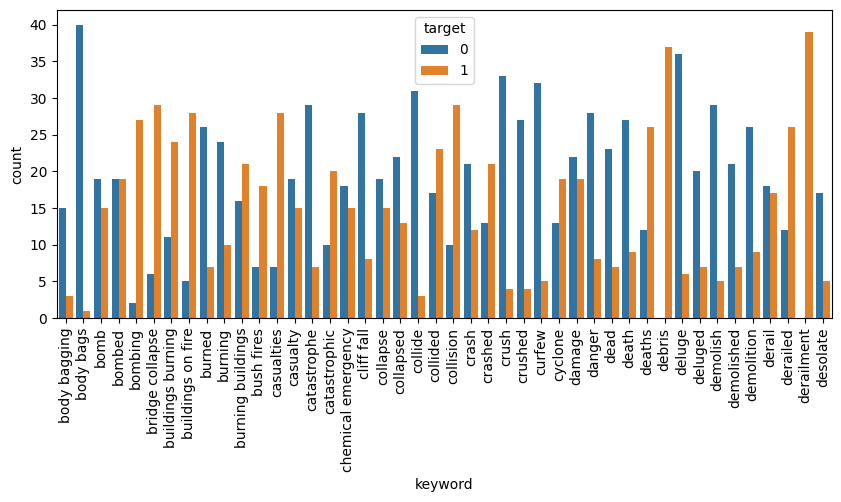

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(data=df[1000:2500], x='keyword',hue='target')
plt.xticks(rotation=90);

# Split Train Data to do inital testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df['text combo'] = df['keyword']+" "+df['location']+" "+df['text']
df_test['text combo'] = df_test['keyword']+" "+df_test['location']+" "+df_test['text']

df[800:804]

,id,keyword,location,text,target,unclean,text combo
800,1160,blight,Laventillemoorings,f you dotish to blight your car go right ahea...,0,If you dotish to blight your car go right ahea...,blight Laventillemoorings f you dotish to bl...
801,1162,blight,UK,exual evolution light or omen is out to...,0,Sexual Revolution:Blight For Women is out! htt...,blight UK exual evolution light or omen i...
802,1164,blight,Scotland,...,0,LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...,blight Scotland ...
803,1166,blight,London,what is double result live on the app,0,@WillHillBet what is double result live on the...,blight London what is double result live on t...


In [16]:
#X = df.drop(['target','id'], axis=1)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=814)
ids_train = X_train['id']
X_train = X_train['text combo']
ids_test = X_test['id']
X_test = X_test['text combo']

In [17]:
df_test

,id,keyword,location,text,text combo
0,0,,,ust happened a terrible car crash,ust happened a terrible car crash
1,2,,,eard about earthquake is different cities s...,eard about earthquake is different cities ...
2,3,,,there is a forest fire at spot pond geese are...,there is a forest fire at spot pond geese a...
3,9,,,pocalypse lighting pokane wildfires,pocalypse lighting pokane wildfires
4,11,,,yphoon oudelor kills 28 in hina and aiwan,yphoon oudelor kills 28 in hina and aiwan
...,...,...,...,...,...
3258,10861,,,...,...
3259,10865,,,torm in worse than last hurricane y city...,torm in worse than last hurricane y ci...
3260,10868,,,reen ine derailment in hicago,reen ine derailment in hicago
3261,10874,,,issues azardous eather utlook,issues azardous eather utlook


# Setup various models to test

In [18]:
#from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

### Vectorize the text data

In [19]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
X_train_tfidf

<6090x15053 sparse matrix of type '<class 'numpy.float64'>'
	with 58818 stored elements in Compressed Sparse Row format>

###  MultinomialNB model

In [21]:
mnb = MultinomialNB()
param_grid = {'alpha':[1,2,5,10]}
mnb_grid = GridSearchCV(estimator=mnb, param_grid=param_grid, scoring='f1')
mnb_start = time.time()
mnb_grid.fit(X_train_tfidf, y_train)
mnb_end = time.time()
print(f'Time to fit = {mnb_end - mnb_start:.3f}s')
mnb_grid.best_params_

Time to fit = 0.114s


{'alpha': 1}

0.7210300429184548
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       868
           1       0.82      0.64      0.72       655

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



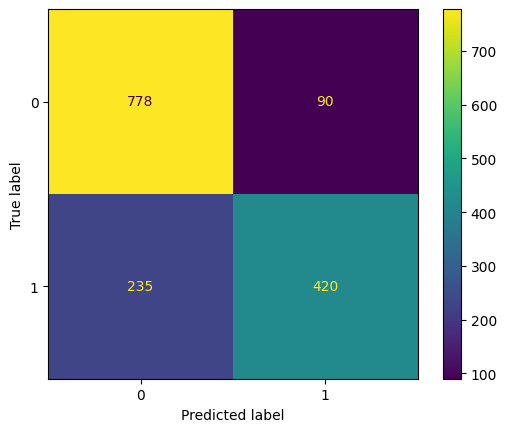

In [22]:
mnb_preds = mnb_grid.predict(X_test_tfidf)
print(f1_score(y_test,mnb_preds))
print(classification_report(y_test,mnb_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, mnb_preds)).plot();

###  LogisticRegression model

In [23]:
log = LogisticRegression(max_iter=1000)
param_grid = {'C':[3,4,5,6,7,8]}
log_grid = GridSearchCV(estimator=log, param_grid=param_grid, scoring='f1')
log_start = time.time()
log_grid.fit(X_train_tfidf, y_train)
log_end = time.time()
print(f'Time to fit = {log_end - log_start:.3f}s')
log_grid.best_params_

Time to fit = 5.815s


{'C': 4}

0.7178217821782178
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       868
           1       0.78      0.66      0.72       655

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



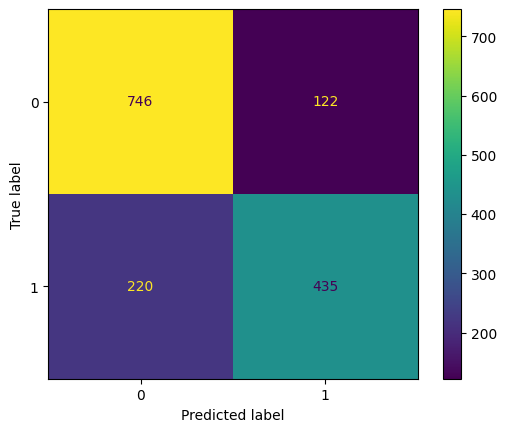

In [24]:
log_preds = log_grid.predict(X_test_tfidf)
print(f1_score(y_test,log_preds))
print(classification_report(y_test,log_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, log_preds)).plot();

### SGDClassifier model

In [25]:
sgdc = SGDClassifier()
#param_grid = {'C':[3,4,5,6,7,8]}
#log_grid = GridSearchCV(estimator=log, param_grid=param_grid, scoring='f1')
sgdc_start = time.time()
sgdc.fit(X_train_tfidf, y_train)
sgdc_end = time.time()
print(f'Time to fit = {sgdc_end - sgdc_start:.3f}s')
sgdc.coef_

Time to fit = 0.030s


array([[ 0.66407563, -0.61637852,  0.24658166, ..., -0.16850618,
         0.75532072, -0.37046265]])

0.7293540474243663
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       868
           1       0.79      0.68      0.73       655

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



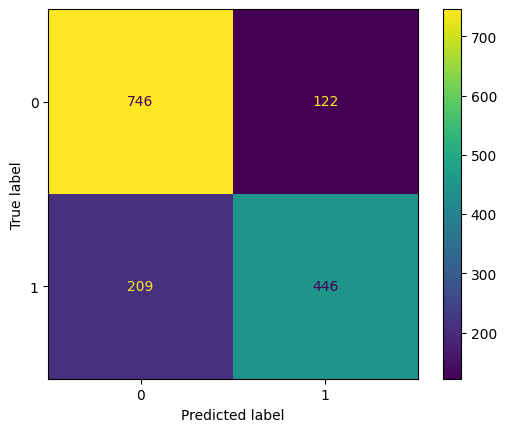

In [26]:
sgdc_preds = sgdc.predict(X_test_tfidf)
print(f1_score(y_test,sgdc_preds))
print(classification_report(y_test,sgdc_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, sgdc_preds)).plot();

### LinearSVC model

In [27]:
lin_svc = LinearSVC()
param_grid = {'C':[1,2,5,10]}
lin_svc_grid = GridSearchCV(estimator=lin_svc, param_grid=param_grid, scoring='f1')
lin_svc_start = time.time()
lin_svc_grid.fit(X_train_tfidf, y_train)
lin_svc_end = time.time()
print(f'Time to fit = {lin_svc_end - lin_svc_start:.3f}s')
lin_svc_grid.best_params_

Time to fit = 1.292s


{'C': 1}

0.71658615136876
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       868
           1       0.76      0.68      0.72       655

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



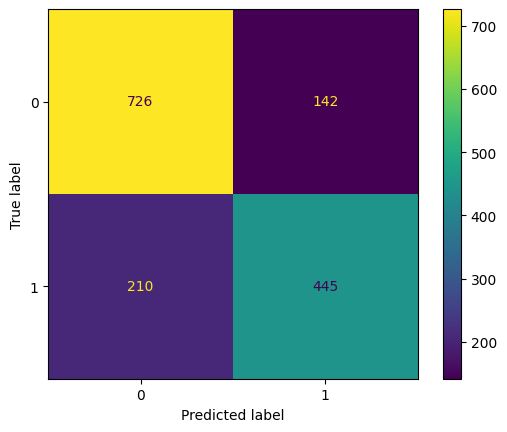

In [28]:
lin_svc_preds = lin_svc_grid.predict(X_test_tfidf)
print(f1_score(y_test,lin_svc_preds))
print(classification_report(y_test,lin_svc_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lin_svc_preds)).plot();

### SVC model
<span style="font-size:16px;color:red;"> Below cell is the slowest cell by far (takes ~4 minutes with the grid search) </span>

In [29]:
# svc = SVC()
# param_grid = {'C': [1,10,100], 
#               'gamma': [1,0.1,0.01]}
# svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1')
# svc_start = time.time()
# svc_grid.fit(X_train_tfidf, y_train)
# svc_end = time.time()
# print(f'Time to fit = {svc_end - svc_start:.3f}s')
# svc_grid.best_params_

In [30]:
# svc_preds = svc_grid.predict(X_test_tfidf)
# print(f1_score(y_test,svc_preds))
# print(classification_report(y_test,svc_preds))
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, svc_preds)).plot();

# Compare Models

In [31]:
print(f'MNB time to fit = {mnb_end - mnb_start:.3f}s')
print(f'MNB f1 score = {f1_score(y_test,mnb_preds):.4f}')
print('-'*10)
print(f'LogReg time to fit = {log_end - log_start:.3f}s')
print(f'LogReg f1 score = {f1_score(y_test,log_preds):.4f}')
print('-'*10)
print(f'SGDClass time to fit = {sgdc_end - sgdc_start:.3f}s')
print(f'SGDClass f1 score = {f1_score(y_test,sgdc_preds):.4f}')
print('-'*10)
print(f'LinSVC time to fit = {lin_svc_end - lin_svc_start:.3f}s')
print(f'LinSVC f1 score = {f1_score(y_test,lin_svc_preds):.4f}')
# print('-'*10)
# print(f'SVC time to fit = {svc_end - svc_start:.3f}s')
# print(f'SVC f1 score = {f1_score(y_test,svc_preds):.4f}')

MNB time to fit = 0.114s
MNB f1 score = 0.7210
----------
LogReg time to fit = 5.815s
LogReg f1 score = 0.7178
----------
SGDClass time to fit = 0.030s
SGDClass f1 score = 0.7294
----------
LinSVC time to fit = 1.292s
LinSVC f1 score = 0.7166


# Final Data Set prep

In [32]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X['text combo'])
X_final_train_tfidf = tfidf.transform(X['text combo'])
X_final_test_tfidf = tfidf.transform(df_test['text combo'])
ids_out = df_test['id']

## Final dataset

In [33]:
X_final_train_tfidf

<7613x17102 sparse matrix of type '<class 'numpy.float64'>'
	with 73569 stored elements in Compressed Sparse Row format>

In [34]:
# model = SVC(**svc_grid.best_params_)
model = LogisticRegression(max_iter=1000, **log_grid.best_params_)
# model = SGDClassifier()
final_start = time.time()
model.fit(X_final_train_tfidf, y)
final_end = time.time()
print(f'Time to fit = {final_end - final_start:.3f}s')

Time to fit = 0.408s


In [35]:
final_preds = model.predict(X_final_test_tfidf)

# Final output formatting

In [36]:
output_df = pd.DataFrame({'id': ids_out,
                          'target': final_preds.squeeze()})

In [37]:
output_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [38]:
output_df.to_csv('/kaggle/working/submission.csv', index=False)